# Proyek Analisis Data: <font color = 'blue'> Bike Sharing Dataset </font>
- **Nama :** <font color = 'darkgreen'> Muhammad Fatoni</font>
- **Email :** a550ybm319@devacademy.id
- **ID Dicoding:** <font color = 'darkred'>  A550YBM319 </font>

## Menentukan Pertanyaan Bisnis

- Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda berdasarkan waktu?
- Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana dampak kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana distribusi jumlah penyewa antara pengguna kasual dan pengguna terdaftar?
- Bagaimana tren penyewaan sepeda berdasarkan jam?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd # Untuk mengolah dataframe
import seaborn as sns # Untuk visualisasi
import matplotlib.pyplot as plt # Untuk visualisasi

## Data Wrangling

### Gathering Data

In [6]:
# Memnaggil dataset
df_hour = pd.read_csv('dashboard/hour.csv', delimiter=',')

In [7]:
# Melihat kolom-kolom pada dataset
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**About Dataset:**
1. `instant`: Record index (a unique identifier for each row of data).

2. `dteday`: Date of the record (date of the observation).

3. `season`: The season during which the data was recorded:
- 1: Spring
- 2: Summer
- 3: Fall
- 4: Winter

4. `yr`: Year of observation:
- 0: 2011
- 1: 2012

5. `mnth`: Month of the year (1 to 12).

6. `hr`: Hour of the day (0 to 23).

7. `holiday`: Whether the day is a holiday (binary variable):
- 1: Holiday
- 0: Not a holiday

8. `weekday`: Day of the week (numeric representation from 0 to 6).

9. `workingday`: Whether the day is a working day or not (binary variable):
- 1: Working day (not a weekend or holiday)
- 0: Not a working day (weekend or holiday)

10. `weathersit`: Weather conditions on that day:
- 1: Clear, Few clouds, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

11. `temp`: Normalized temperature in Celsius. 

12. `atemp`: Normalized apparent temperature in Celsius. Calculated similarly to temp, but with different min and max values.

13. `hum`: Normalized humidity. Calculated by dividing the humidity percentage by 100.

14. `windspeed`: Normalized wind speed. 

15. `casual`: Number of casual users who rented bikes (non-registered users).

16. `registered`: Number of registered users who rented bikes (users with a membership).

17. `cnt`: Total number of bikes rented (sum of casual and registered users).

### Assessing Data

In [8]:
# Melihat 5 sample data
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14935,14936,2012-09-19,3,1,9,12,0,3,1,1,0.60,0.6212,0.43,0.2537,53,260,313
11223,11224,2012-04-17,2,1,4,20,0,2,1,1,0.60,0.6061,0.23,0.2836,44,358,402
11160,11161,2012-04-15,2,1,4,5,0,0,0,1,0.50,0.4848,0.68,0.1642,4,6,10
14865,14866,2012-09-16,3,1,9,14,0,0,0,1,0.66,0.6212,0.39,0.1343,225,410,635
6668,6669,2011-10-10,4,0,10,10,1,1,0,1,0.56,0.5303,0.73,0.1642,107,158,265


In [9]:
# Melihat informasi data
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Melihat ringkasan statistik numerik
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# Melihat jumlah nilai unik 
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
# Mengecek missing value
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Mengecek duplikasi data
df_hour.duplicated().sum()

0

**Insight:**
- Tidak Ada Missing Values dan Data Duplikat
- Format kolom `dteday` perlu diubah menjadi datetime.

### Cleaning Data

In [14]:
# Ubah format tipe data kolom dteday
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [15]:
# Mengecek format dteday apakah sudah sesuai
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Format kolom sudah sesuai

## Exploratory Data Analysis (EDA)

### <font color='green'> Agregasi Data Analysis </font>

In [16]:
# Agregasi jumlah peminjaman sepeda berdasarkan musim (season)
season_agg = df_hour.groupby('season')['cnt'].agg(['mean', 'sum']).reset_index()
season_agg

,season,mean,sum
0,1,111.114569,471348
1,2,208.344069,918589
2,3,236.016237,1061129
3,4,198.868856,841613


In [17]:
# Agregasi jumlah peminjaman sepeda berdasarkan kondisi cuaca (weathersit)
weathersit_agg = df_hour.groupby('weathersit')['cnt'].agg(['mean', 'sum']).reset_index()
weathersit_agg

,weathersit,mean,sum
0,1,204.869272,2338173
1,2,175.165493,795952
2,3,111.579281,158331
3,4,74.333333,223


In [18]:
# Agregasi jumlah peminjaman sepeda berdasarkan bulan
monthly_trend = df_hour.resample('M', on='dteday')['cnt'].sum().reset_index()
monthly_trend

,dteday,cnt
0,2011-01-31,38189
1,2011-02-28,48215
2,2011-03-31,64045
3,2011-04-30,94870
4,2011-05-31,135821
5,2011-06-30,143512
6,2011-07-31,141341
7,2011-08-31,136691
8,2011-09-30,127418
9,2011-10-31,123511


### <font color='green'> Univariate Analysis </font>

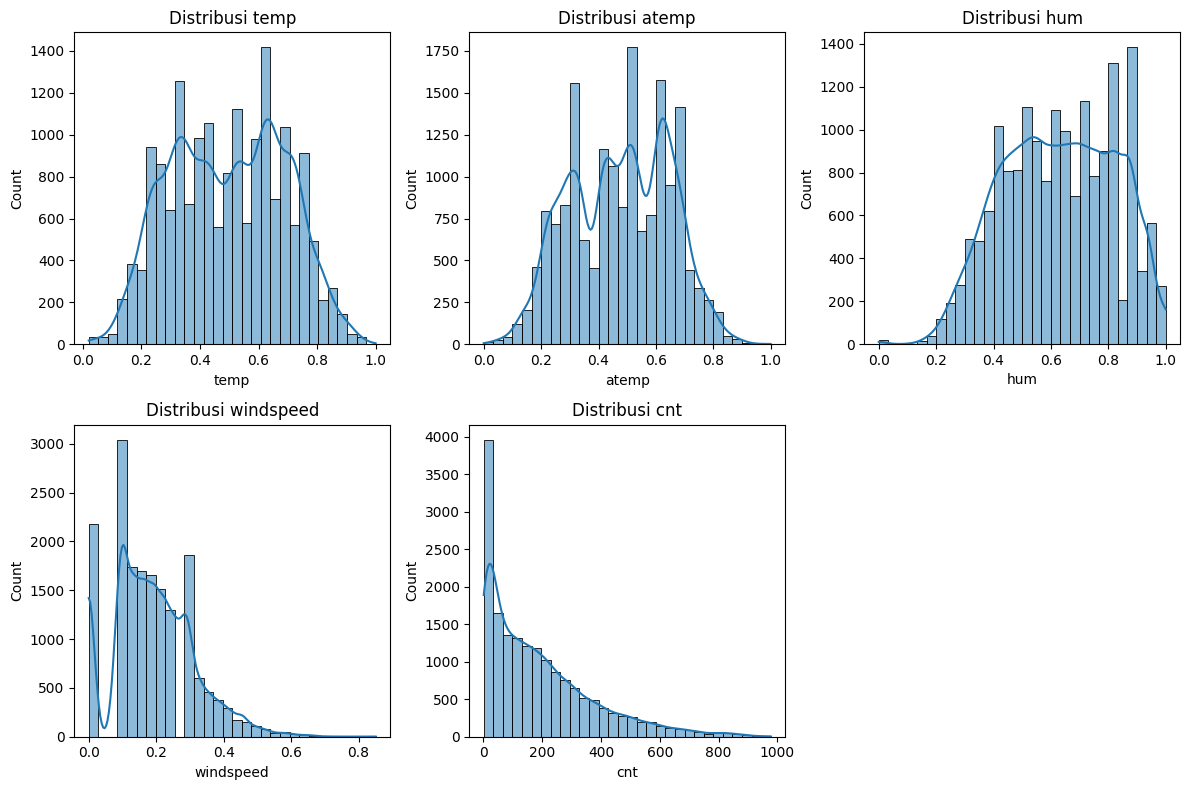

In [19]:
# filtering numeric columns
numerical_cols = ["temp", "atemp", "hum", "windspeed", "cnt"]

plt.figure(figsize=(12, 8)) # set ukuran plot

# visualisasi numerical_cols
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_hour[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

**Insight:**
-  Distribusi kelembaban (`hum`) cenderung normal, artinya sebagian besar nilai kelembaban berada di sekitar nilai rata-rata. Ini menunjukkan bahwa kondisi kelembaban relatif stabil dalam dataset ini.
- Temperature (`temp`) dan Feels-like Temperature (`atemp`). Kedua variabel ini cenderung normal, tetapi memiliki 2-3 pucuk (multimodal distribution). Puncak ini bisa menunjukkan bahwa ada beberapa kelompok suhu yang dominan, misalnya suhu yang berbeda di musim dingin dan musim panas.
- Distribusi windspeed positively skewed, artinya ada lebih banyak jam dengan kecepatan angin rendah, tetapi beberapa jam memiliki kecepatan angin tinggi. Hal ini masuk akal karena angin kencang cenderung jarang terjadi dalam kondisi normal.
- Distribusi jumlah total peminjaman sepeda (cnt) juga positively skewed, artinya sebagian besar waktu peminjaman terjadi dalam jumlah kecil-menengah, tetapi ada beberapa waktu di mana jumlah peminjaman sangat tinggi.

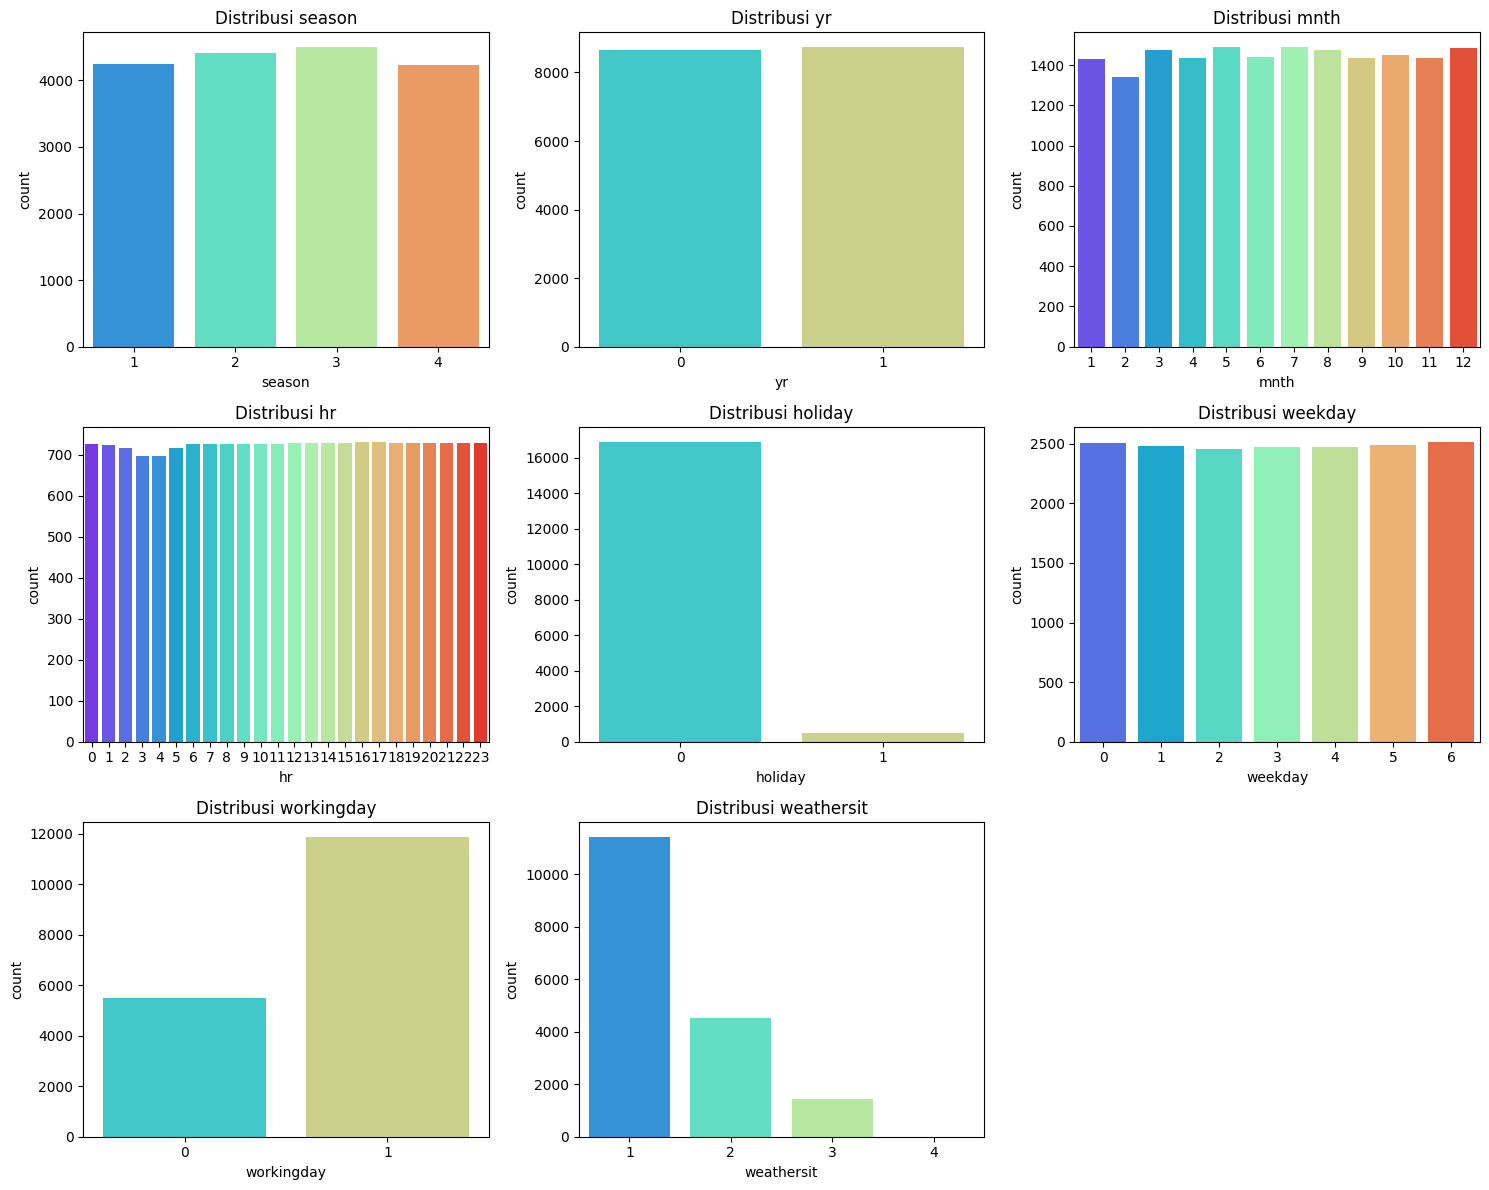

In [20]:
# filtering categoric columns
categorical_cols = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

# visualisasi numerical_cols
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df_hour[col], palette="rainbow")
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

**Insight:**
- Cuaca cerah lebih sering terjadi dibandingkan cuaca buruk, yang bisa berdampak pada jumlah peminjaman sepeda.
- Variabel kategorikal lainnya normal dan cukup merata, sehingga tidak ada bias signifikan dalam distribusi data terkait musim atau hari dalam seminggu.

### <font color='green'> Bivariate Analysis </font>

#### Korelasi antara variabel numerik dan cnt

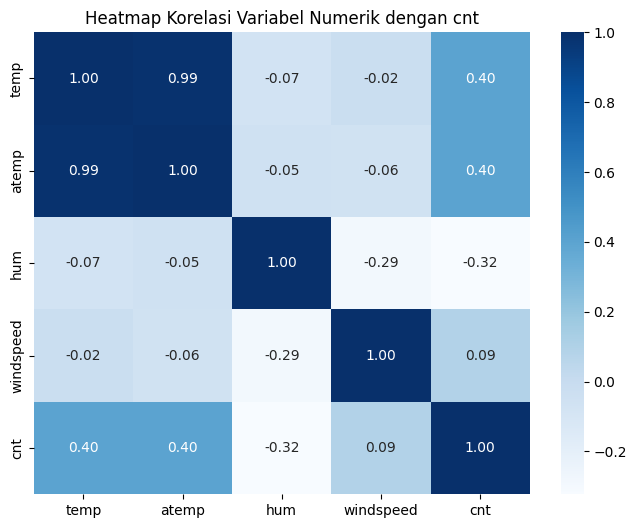

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_hour[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap Korelasi Variabel Numerik dengan cnt')
plt.show()

#### Scatter plot untuk hubungan cnt dengan variabel numerik

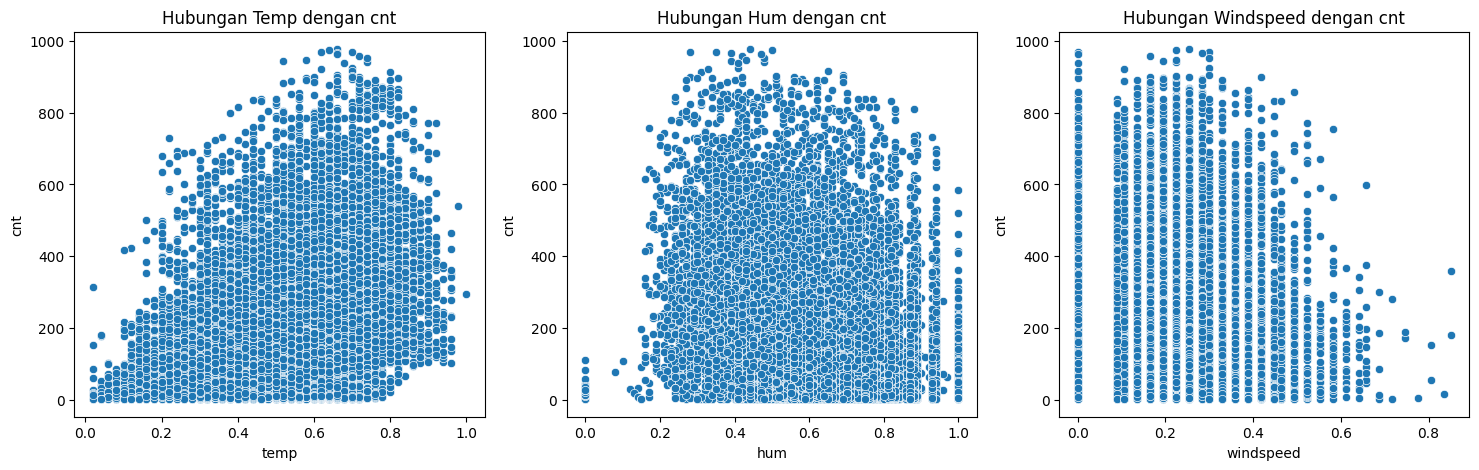

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='temp', y='cnt', data=df_hour, ax=axes[0], alpha=1)
axes[0].set_title('Hubungan Temp dengan cnt')
sns.scatterplot(x='hum', y='cnt', data=df_hour, ax=axes[1], alpha=1)
axes[1].set_title('Hubungan Hum dengan cnt')
sns.scatterplot(x='windspeed', y='cnt', data=df_hour, ax=axes[2], alpha=1)
axes[2].set_title('Hubungan Windspeed dengan cnt')
plt.show()

#### Boxplot untuk hubungan variabel kategorikal dengan cnt

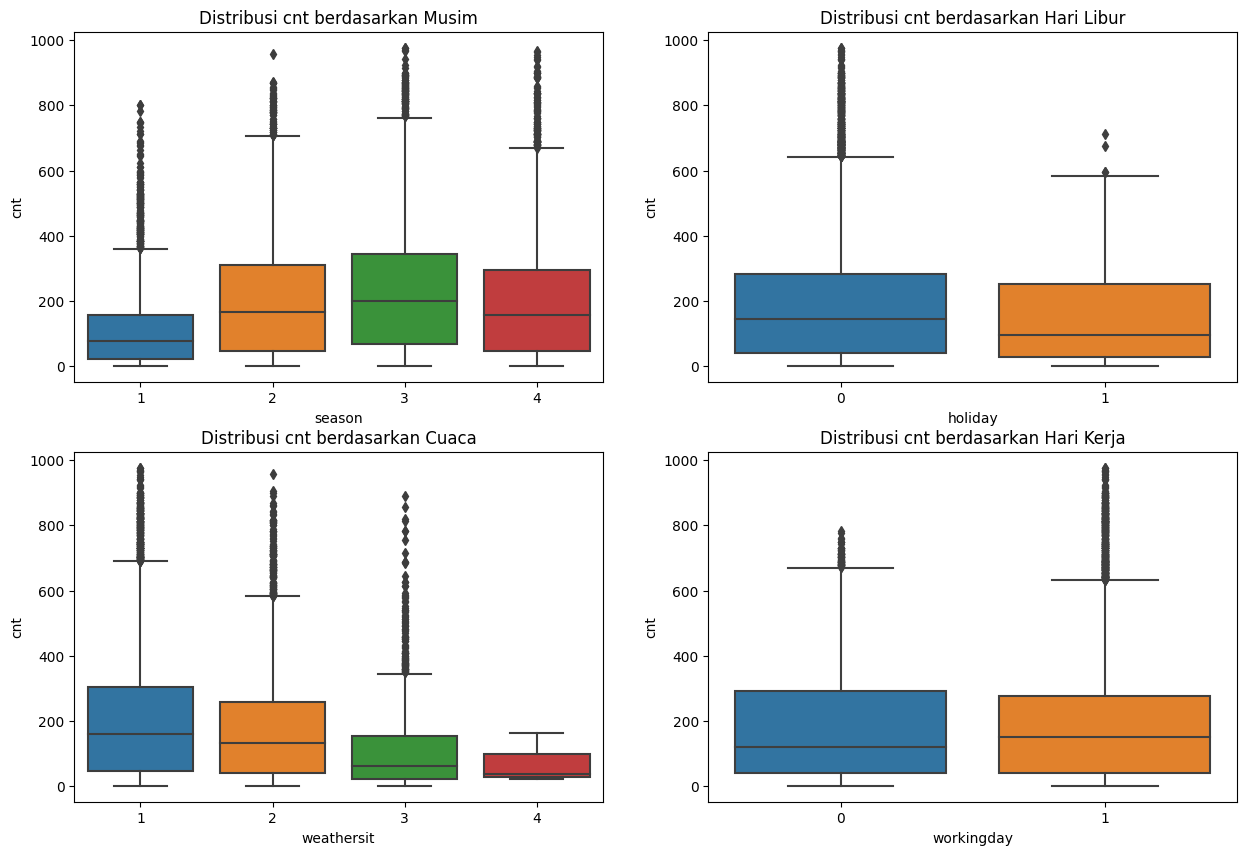

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='season', y='cnt', data=df_hour, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi cnt berdasarkan Musim')
sns.boxplot(x='holiday', y='cnt', data=df_hour, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi cnt berdasarkan Hari Libur')
sns.boxplot(x='weathersit', y='cnt', data=df_hour, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi cnt berdasarkan Cuaca')
sns.boxplot(x='workingday', y='cnt', data=df_hour, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi cnt berdasarkan Hari Kerja')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda?

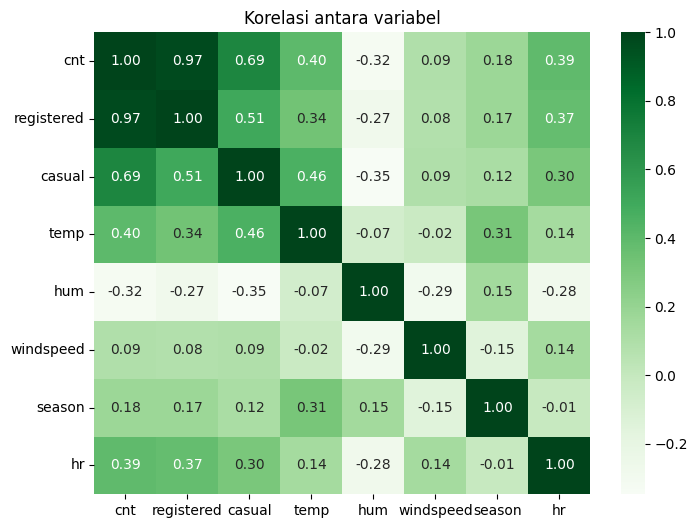

In [33]:
plt.figure(figsize=(8, 6)) # menyetel ukuran plot

# menghitung korelasi dan visualisasi plot korelasinya
corr_matrix = df_hour[['cnt', 'registered', 'casual', 'temp', 'hum', 'windspeed', 'season', 'hr']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f')

plt.title('Korelasi antara variabel') # set judul
plt.show() # plot show

In [24]:
df_hour[['cnt', 'registered', 'casual', 'temp', 'hum', 'windspeed', 'season', 'hr']].corr()

,cnt,registered,casual,temp,hum,windspeed,season,hr
cnt,1.000000,0.972151,0.694564,0.404772,-0.322911,0.093234,0.178056,0.394071
registered,0.972151,1.000000,0.506618,0.335361,-0.273933,0.082321,0.174226,0.374141
casual,0.694564,0.506618,1.000000,0.459616,-0.347028,0.090287,0.120206,0.301202
temp,0.404772,0.335361,0.459616,1.000000,-0.069881,-0.023125,0.312025,0.137603
hum,-0.322911,-0.273933,-0.347028,-0.069881,1.000000,-0.290105,0.150625,-0.276498
windspeed,0.093234,0.082321,0.090287,-0.023125,-0.290105,1.000000,-0.149773,0.137252
season,0.178056,0.174226,0.120206,0.312025,0.150625,-0.149773,1.000000,-0.006117
hr,0.394071,0.374141,0.301202,0.137603,-0.276498,0.137252,-0.006117,1.000000


**Insight:**
- Jumlah penyewaan sepeda (cnt) memiliki korelasi tertinggi dengan jumlah pengguna terdaftar (registered) sebesar 0.972. Ini menunjukkan bahwa mayoritas penyewaan berasal dari pengguna yang sudah terdaftar.
- Suhu (temp) memiliki korelasi positif dengan penyewaan sepeda (0.405). Semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Kelembaban udara (hum) memiliki korelasi negatif dengan jumlah penyewaan sepeda (-0.323). Semakin tinggi kelembaban, semakin sedikit sepeda yang disewa.
- Kecepatan angin (windspeed) memiliki korelasi yang sangat rendah terhadap penyewaan sepeda (0.093). Ini menunjukkan bahwa faktor ini tidak terlalu berpengaruh terhadap keputusan seseorang untuk menyewa sepeda.
- Musim (season) memiliki korelasi rendah terhadap penyewaan sepeda (0.178). Ini menunjukkan bahwa faktor musiman tidak terlalu menentukan jumlah penyewaan sepeda dibandingkan faktor cuaca lainnya seperti suhu dan kelembaban.
- Jam dalam sehari (hr) memiliki korelasi sebesar 0.394 dengan jumlah penyewaan sepeda. Ini menegaskan bahwa terdapat pola waktu yang mempengaruhi jumlah penyewaan sepeda, seperti jam sibuk pagi dan sore hari.

### Pertanyaan 2:

### Bagaimana tren peminjaman sepeda dari tahun ke tahun?

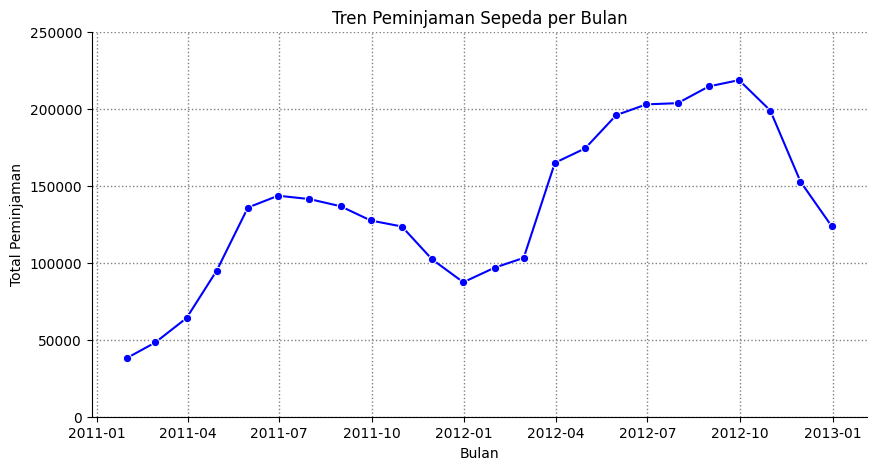

In [25]:
plt.figure(figsize=(10, 5)) # set ukuran plot

# plot lineplot jumlah penyewaan berdasarkan jam dan perbandingannya antara hari kerja dan bukan hari kerja
sns.lineplot(x=monthly_trend['dteday'], y=monthly_trend['cnt'], ci=None, marker='o', color='blue')

plt.ylim(ymin=0) # set batas min sumbu y=0

# set skala nilai di sumbu y
y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

# set judul dan label sumbu x dan y
plt.title('Tren Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')

plt.grid(linestyle=':', color='gray', linewidth=1) # set garis grid

# menghapus batas / border plot di atas dan kanan
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show() # plot show

In [26]:
# Menambah kolom 'yr' untuk mengetahui tahun dari tanggal
df_hour['yr'] = df_hour['dteday'].dt.year

# Agregasi jumlah peminjaman per-bulan dengan tambahan informasi tahun
monthly_trend = df_hour.groupby([df_hour['dteday'].dt.to_period('M'), 'yr'])['cnt'].sum().reset_index()
monthly_trend['dteday'] = monthly_trend['dteday'].astype(str)  # mengubah format menjadi string untuk plot

In [27]:
# Konversi ke datetime
monthly_trend['dteday'] = pd.to_datetime(monthly_trend['dteday'])

# Menambah kolom month untuk plot 
monthly_trend['month'] = monthly_trend['dteday'].dt.month

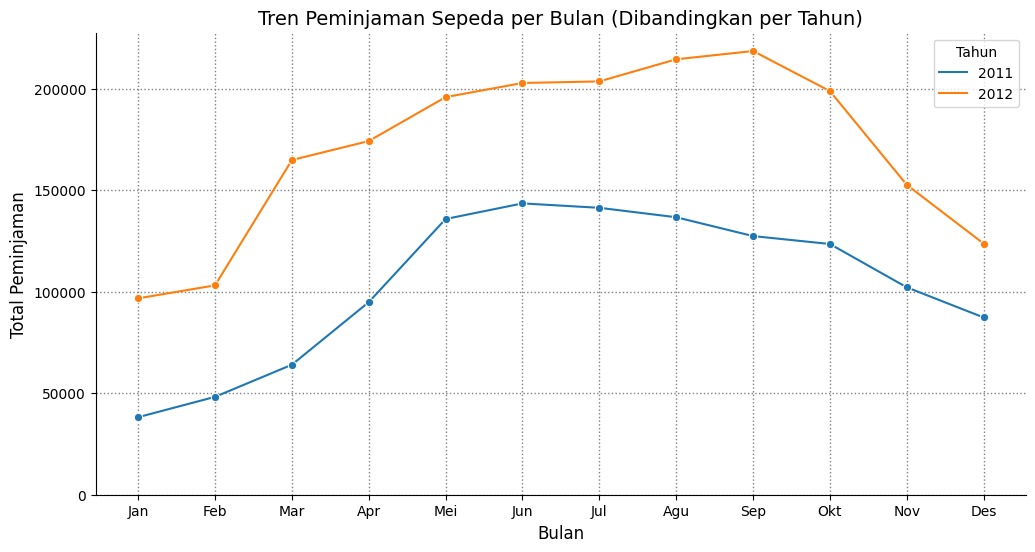

In [28]:
plt.figure(figsize=(12, 6)) #set ukuran plot

# visualisasi lineplot berdasarkan tahun
sns.lineplot(
    x=monthly_trend['month'],
    y=monthly_trend['cnt'],
    hue=monthly_trend['yr'].astype(str),  
    ci=None,
    marker='o'
)

plt.ylim(ymin=0) # set batas y=0

# set nama judul, sumbu x dan y
plt.title('Tren Peminjaman Sepeda per Bulan (Dibandingkan per Tahun)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)

# Menggunakan label nama bulan
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])

plt.legend(title="Tahun") # menampilkan legenda

plt.grid(linestyle=':', color='gray', linewidth=1) # set garis grid

# Menghilangkan border atas & kanan
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show() # plot show

**Insight:**
- Tren peminjaman sepeda menunjukkan pola musiman yang mirip antara kedua tahun, dengan peningkatan dari awal tahun ke pertengahan tahun, mencapai puncak sekitar Mei - September, lalu menurun kembali menjelang akhir tahun.
- Ini menunjukkan bahwa cuaca mungkin mempengaruhi tren peminjaman sepeda, dengan lebih banyak orang menggunakan sepeda saat bulan-bulan yang lebih hangat.

### Pertanyaan 3:

### Bagaimana peminjaman sepeda berdasarkan musim?

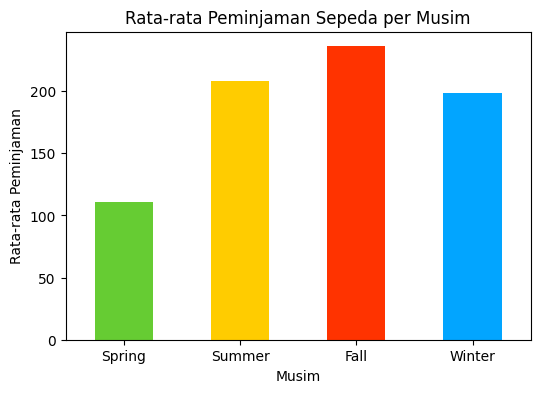

In [16]:
# Mengelompokkan data berdasarkan kolom 'season' dan menghitung rata-rata dari kolom 'cnt'
df_hour.groupby("season")["cnt"].mean().plot(kind="bar", figsize=(6,4), color=["#66cc33", "#ffcc00", "#ff3300", "#02a5ff"])

# Memberi label judul, sumbu x dan y
plt.title("Rata-rata Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")

# Mengubah label pada sumbu X agar lebih mudah dipahami
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"], rotation=0)

# Menampilkan plot
plt.show()

**Insight:**
- Peminjaman sepeda tertinggi terjadi pada musim gugur (Fall) dan terendah pada musim semi (Spring). Hal ini menunjukkan bahwa musim gugur adalah waktu yang paling diminati untuk bersepeda, sementara musim semi memiliki jumlah peminjaman paling sedikit, kemungkinan karena cuaca yang lebih basah atau kurang mendukung.

### Pertanyaan 4:

### Bagaimana pola penyewaan sepeda berdasarkan waktu?

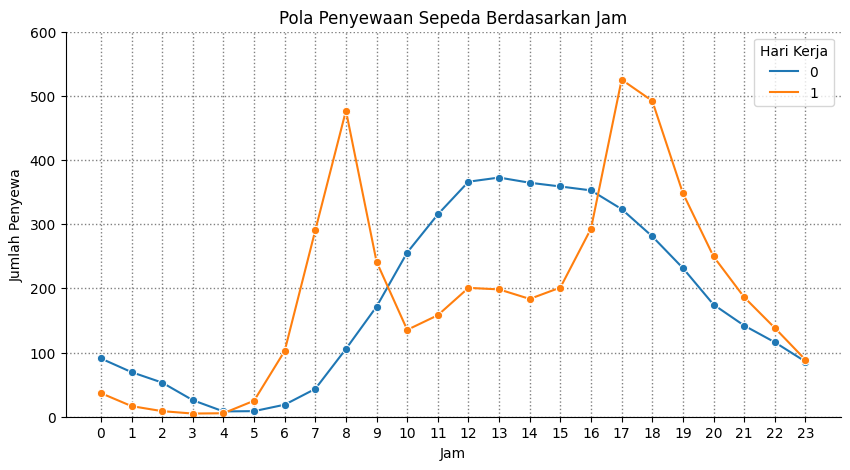

In [93]:
plt.figure(figsize=(10, 5)) # set ukuran plot

# plot lineplot jumlah penyewaan berdasarkan jam dan perbandingannya antara hari kerja dan bukan hari kerja
sns.lineplot(x='hr', y='cnt', data=df_hour, hue='workingday', ci=None, marker='o')

plt.ylim(ymin=0) # set batas min sumbu y=0
plt.xticks(range(0,24)) # set sumbu x menampilkan nilai 1 samapi 23

# set skala nilai di sumbu y
y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

# set judul dan label sumbu x dan y
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')

plt.legend(title='Hari Kerja') # menampilkan legenda

plt.grid(linestyle=':', color='gray', linewidth=1) # set garis grid

# menghapus batas / border plot di atas dan kanan
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show() # plot show

**Insight:**
- Pada hari kerja, sepeda lebih banyak digunakan untuk perjalanan ke kantor atau sekolah, sedangkan pada hari libur, pengguna cenderung bersepeda untuk aktivitas santai di siang hingga sore hari.

### **Pertanyaan 5:**

### **Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?**

In [56]:
# Agregasi jumlah penyewaan berdasarkan hari kerja dan kategori pengguna
df_grouped = df_hour.groupby("workingday")[["registered", "casual"]].sum().reset_index()

# Ubah nilai numerik menjadi kategori (1 = Hari Kerja, 0 = Hari Libur)
df_grouped["workingday"] = df_grouped["workingday"].map({1: "Hari Kerja", 0: "Hari Libur"})

In [63]:
df_grouped

,workingday,registered,casual
0,Hari Libur,683537,316732
1,Hari Kerja,1989125,303285


In [58]:
# ubah format dataframe dari bentuk lebar ke panjang agar lebih mudah dianalisis  
df_melted = df_grouped.melt(id_vars="workingday", var_name="User Type", value_name="Total Rentals")

In [62]:
df_melted

,workingday,User Type,Total Rentals
0,Hari Libur,registered,683537
1,Hari Kerja,registered,1989125
2,Hari Libur,casual,316732
3,Hari Kerja,casual,303285


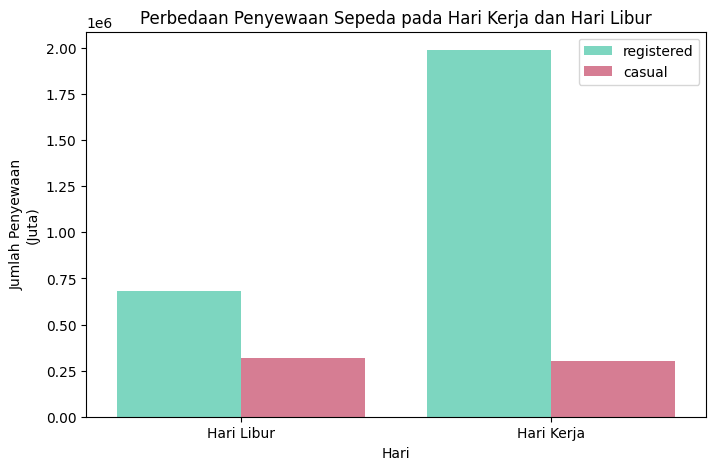

In [77]:
plt.figure(figsize=(8, 5)) # set ukuran plot

# visualisasi barplot untuk menghitung jumlah penyewaan berdasarkan hari dengan pembanding tipe cnt (registered & casual)
sns.barplot(data=df_melted, x="workingday", y="Total Rentals", hue="User Type", palette=["#6ee5c7", "#e56e8c"])

# set nama judul, sumbu x dan y
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan\n(Juta)")
plt.title("Perbedaan Penyewaan Sepeda pada Hari Kerja dan Hari Libur")

plt.legend() # menampilkan legenda
plt.show() # plot show

**Insight:**
- Penyewaan sepeda lebih tinggi pada hari kerja karena mayoritas pengguna registered menggunakan sepeda untuk keperluan transportasi harian.
- Pada hari libur, jumlah pengguna casual meningkat, menunjukkan bahwa banyak orang menggunakan sepeda untuk rekreasi atau aktivitas non-rutin.

### **Pertanyaan 6:**

### **Bagaimana dampak kondisi cuaca terhadap jumlah penyewaan sepeda?**

In [78]:
# Mengelompokkan data berdasarkan kondisi cuaca ('weathersit')  

weather_rentals = df_hour.groupby('weathersit')['cnt'].sum().reset_index()

In [81]:
weather_rentals

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


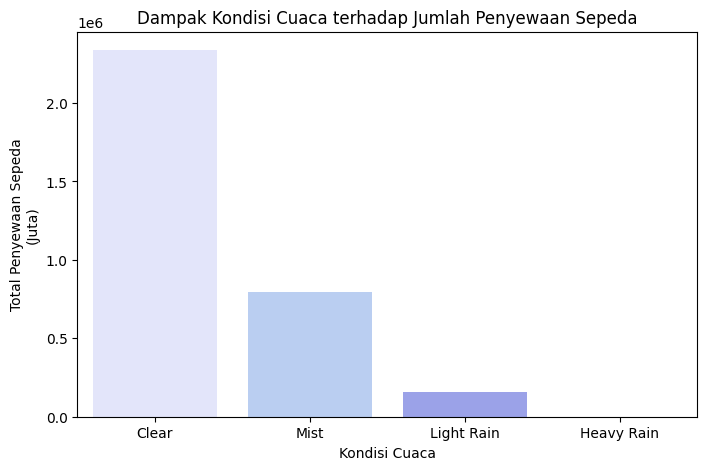

In [84]:
plt.figure(figsize=(8, 5)) #set ukuran plot

# visualisasi barplot jumlah penyewaan berdasarkan cuaca
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette=['#dfe2fe', '#b1cbfa', '#8e98f5', '#7971ea'])

# set nama judul, nam sumbu x dan y
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda\n(Juta)")
plt.title("Dampak Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda")

# set nama nilai di sumbu x
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Rain", "Heavy Rain"], rotation=0)

plt.show() # plot show

**Insight:**
- Orang lebih nyaman bersepeda ketika cuaca mendukung.

### **Pertanyaan 7:**

###  Bagaimana distribusi jumlah penyewa antara pengguna kasual dan pengguna terdaftar?

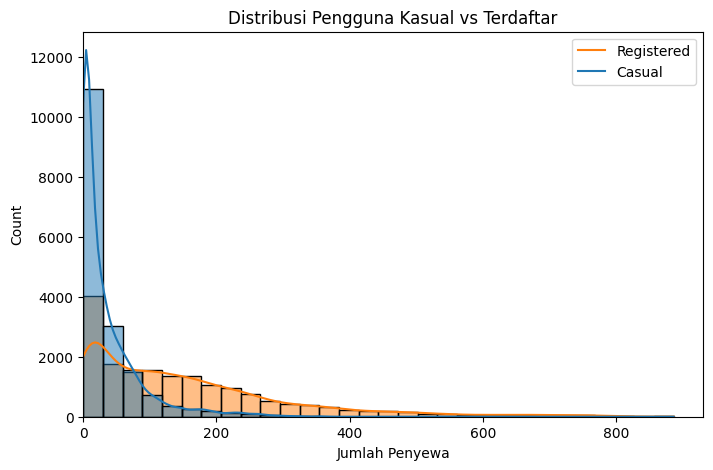

In [100]:
plt.figure(figsize=(8, 5)) # set ukuran plot

# visualisasi distribusi pengguna casual vs registered berdasarkan jumlah penyewaan
sns.histplot(df_hour[['casual', 'registered']], bins=30, kde=True)

plt.xlim(xmin=0) #set batas min sumbu x=0

# set nama judul, sumbu x dan y
plt.title('Distribusi Pengguna Kasual vs Terdaftar')
plt.xlabel('Jumlah Penyewa')

plt.legend(['Registered', 'Casual']) #menampilkan legenda
plt.show() #plot show

In [97]:
df_hour[['casual', 'registered']].describe()

,casual,registered
count,17379.000000,17379.000000
mean,35.676218,153.786869
std,49.305030,151.357286
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


**Insight:**
- Pengguna terdaftar (`registered`) jauh lebih dominan dalam penyewaan sepeda dibandingkan pengguna kasual (`casual`).
- Distribusi pengguna terdaftar (`registered`) lebih luas dan memiliki nilai maksimum yang lebih besar, menunjukkan bahwa mereka lebih sering menggunakan layanan.

### **Pertanyaan 8:**

### Bagaimana tren penyewaan sepeda berdasarkan jam?

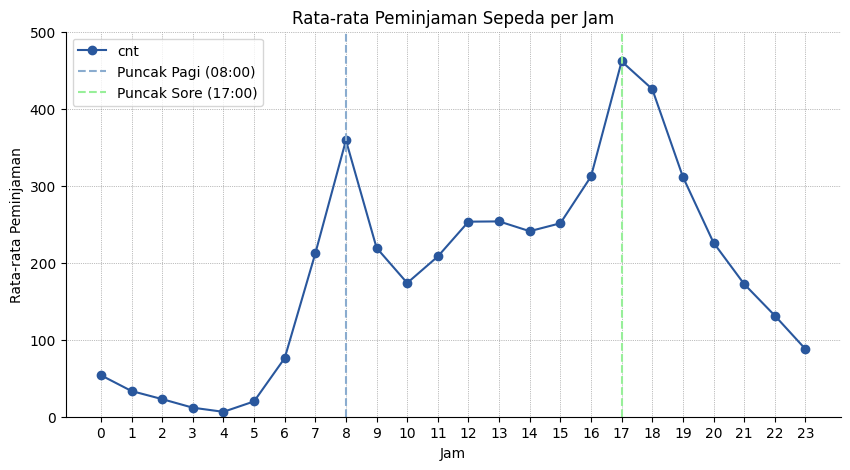

In [124]:
# Mengelompokkan data berdasarkan jam ('hr')  
# Dan menghitung rata-rata jumlah penyewaan sepeda ('cnt') untuk setiap jam 
df_hour.groupby("hr")["cnt"].mean().plot(kind="line", figsize=(10,5), marker="o", color='#29579d')

# set batas min sumbu y=0 dan menentukan nilai sumbu x - samapi 23
plt.ylim(ymin=0)
plt.xticks(range(0, 24))

# set skala di sumbu y
y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

# membuat garis vertikal di sumbu x ke 8 dan 17
plt.axvline(8, color='#8aaccf', linestyle='--', label='Puncak Pagi (08:00)')
plt.axvline(17, color='#97ef99', linestyle='--', label='Puncak Sore (17:00)')

# set nama jduul, sumbu x dan y
plt.title("Rata-rata Peminjaman Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman")

plt.grid(linestyle=':', color='gray', linewidth=.5) # set garis grid

# menghapus garis border di atas dan kanan plot
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend() # menampilkan legenda

plt.show() # plot show

**Insight:**
- Peminjaman sepeda menunjukkan pola harian yang jelas, dengan frekuensi terendah pada dini hari (00:00 - 05:00), puncak pada jam sibuk pagi (07:00 - 08:00) dan sore (17:00 - 18:00), serta penurunan setelahnya, mencerminkan pola mobilitas kerja atau sekolah.

## Analisis Lanjutan (Opsional)

### Membuat Kategori Penyewa Berdasarkan jam

In [141]:
# Menentukan batasan kategori
bins = [0, 100, 200, df_hour['cnt'].max()]  
labels = ['Low', 'Medium', 'High'] 

# Binning jumlah ('cnt') ke dalam kategori bins
df_hour['rental_category'] = pd.cut(df_hour['cnt'], bins=bins, labels=labels, include_lowest=True)

### Clustering Berdasarkan Waktu

In [116]:
# Menentukan batasan binning
time_bins = [0, 6, 12, 18, 24]
time_labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']

# Mengelompokkan jam ('hr') ke dalam kategori waktu time_bins  
df_hour['time_category'] = pd.cut(df_hour['hr'], bins=time_bins, labels=time_labels, include_lowest=True)

### Kategori Rental yang Paling Sering Muncul Berdasarkan Time Category

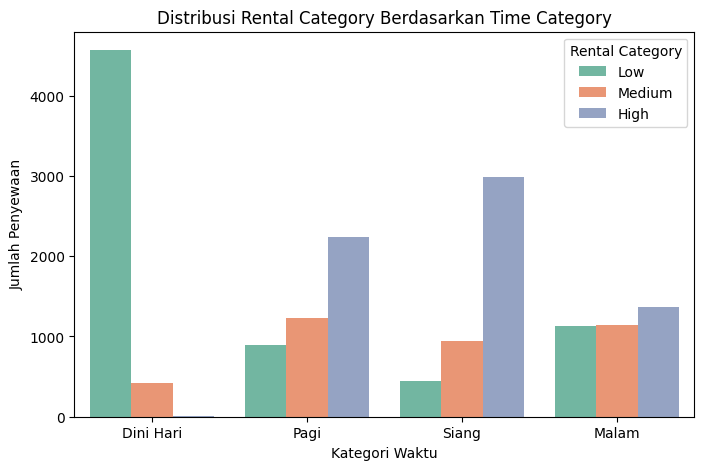

In [151]:
plt.figure(figsize=(8, 5)) #set ukuran plot

# Membuat count plot untuk melihat distribusi jumlah penyewaan sepeda berdasarkan kategori waktu  
sns.countplot(data=df_hour, x='time_category', hue='rental_category', palette='Set2')

# set nama judul, sumbu x dan y
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Penyewaan')
plt.title('Distribusi Rental Category Berdasarkan Time Category')

plt.xticks(rotation=0) # set nama sumbu x sejajar 0 derajat
plt.legend(title='Rental Category') # menampilkan legenda

plt.show() #plot show

**Insight:**
- Penyewaan tertinggi terjadi di pagi dan siang hari.
- Malam hari memiliki distribusi penyewaan yang lebih seimbang.

## Kesimpulan Akhir (General Conclusion):

**1. Pola Penyewaan Sepeda Berdasarkan Waktu**  
- Puncak penyewaan terjadi pada **pukul 07:00 – 09:00 pagi** dan **pukul 17:00 – 19:00 sore**, mencerminkan penggunaan sepeda sebagai moda transportasi utama bagi pekerja dan pelajar saat jam berangkat dan pulang kerja/sekolah.  
- Waktu dengan penyewaan terendah adalah antara **pukul 00:00 – 05:00**, menunjukkan bahwa penggunaan sepeda pada malam hingga dini hari sangat sedikit.  

**2. Pengaruh Jenis Pengguna terhadap Jumlah Penyewaan**  
- **Pengguna terdaftar (registered) menyumbang sekitar 97% dari total penyewaan**, sedangkan **pengguna kasual (casual) hanya sekitar 3%**.  
- Hal ini menunjukkan bahwa sistem penyewaan lebih banyak dimanfaatkan oleh pelanggan tetap dibandingkan wisatawan atau pengguna sesekali.  

**3. Dampak Cuaca terhadap Jumlah Penyewaan**  
- Penyewaan sepeda meningkat seiring dengan **kenaikan suhu hingga sekitar 25°C**, setelah itu cenderung stagnan.  
- **Tingkat kelembaban tinggi (di atas 80%) berdampak negatif terhadap jumlah peminjaman**, kemungkinan karena udara yang lebih lembab membuat bersepeda menjadi kurang nyaman.  
- **Kecepatan angin memiliki korelasi sangat rendah terhadap penyewaan**, yang menunjukkan bahwa faktor ini tidak terlalu memengaruhi keputusan pengguna untuk menyewa sepeda.  

**4. Pola Penyewaan Berdasarkan Musim**  
- Musim dengan penyewaan tertinggi adalah **musim gugur (Fall), dengan rata-rata penyewaan bulanan mencapai lebih dari 200.000 unit**.  
- Musim dengan penyewaan terendah adalah **musim semi (Spring), dengan rata-rata sekitar 100.000 unit per bulan**, kemungkinan karena cuaca yang masih relatif dingin dan sering hujan.  

**5. Tren Penyewaan Sepeda dari Tahun ke Tahun**  
- Jumlah penyewaan sepeda meningkat signifikan dari **tahun 2011 ke 2012**, terutama mulai bulan Maret 2012, yang kemungkinan disebabkan oleh **cuaca lebih baik atau peningkatan pengguna terdaftar**.  
- Tren ini menunjukkan bahwa sistem penyewaan sepeda semakin populer seiring berjalannya waktu.  

---

## **Rekomendasi**  

**1. Optimalisasi Ketersediaan Sepeda di Jam Sibuk**  
- Karena puncak peminjaman terjadi di pagi dan sore hari, **perlu ada peningkatan jumlah sepeda yang tersedia di stasiun utama selama jam sibuk** untuk menghindari kekurangan unit.  
- Meningkatkan jumlah docking station di area dengan permintaan tinggi juga bisa membantu mengakomodasi lonjakan pengguna.  

**2. Strategi untuk Meningkatkan Penyewaan di Musim Dingin & Musim Semi**  
- Mengadakan **promosi atau diskon khusus pada musim semi dan musim dingin** untuk menarik lebih banyak pengguna.  
- Menyediakan sepeda dengan fitur tambahan seperti **pelindung angin atau ban khusus untuk cuaca dingin** bisa meningkatkan kenyamanan pengguna.  

**3. Meningkatkan Partisipasi Pengguna Kasual**  
- Karena pengguna kasual menyumbang bagian kecil dari total penyewaan, bisa dilakukan strategi pemasaran seperti **paket langganan fleksibel atau sistem poin reward** untuk menarik lebih banyak pelanggan sesekali.  

**4. Penggunaan Data untuk Prediksi & Perencanaan**  
- Dengan memanfaatkan **model prediksi berbasis machine learning**, penyedia layanan dapat memperkirakan jumlah penyewaan di bulan mendatang sehingga dapat menyesuaikan persediaan sepeda dengan lebih efisien.  